# streakextract

In [1]:
# source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


## download

In [2]:
/bin/rm -rf 3662
download_chandra_obsid 3662 evt2,asol,msk,bpix
mv -fv 3662/*/*fits.gz .
gunzip -f *fits.gz



  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits       31 Mb  ####################          < 1 s  59653.0 kb/s
  asol     fits       11 Mb  ####################          < 1 s  89776.2 kb/s
  bpix     fits       31 Kb  ####################          < 1 s  2436.6 kb/s
  msk      fits        5 Kb  ####################          < 1 s  251.3 kb/s

      Total download size for ObsId 3662 = 42 Mb
      Total download time for ObsId 3662 = < 1 s

'3662/primary/acisf03662N004_evt2.fits.gz' -> './acisf03662N004_evt2.fits.gz'
'3662/primary/acisf03662_000N004_bpix1.fits.gz' -> './acisf03662_000N004_bpix1.fits.gz'
'3662/primary/pcadf03662_000N001_asol1.fits.gz' -> './pcadf03662_000N001_asol1.fits.gz'
'3662/secondary/acisf03662_000N004_msk1.fits.gz' -> './acisf03662_000N004_msk1.fits.gz'


In [3]:
acis_set_ardlib acisf03662_000N004_bpix1.fits abs-

Updated ardlib parameter file: /proj/sds/Staff/kjg/Threads/streakextract/param/ardlib.par
  AXAF_ACIS0_BADPIX_FILE -> CALDB
  AXAF_ACIS1_BADPIX_FILE -> CALDB
  AXAF_ACIS2_BADPIX_FILE -> acisf03662_000N004_bpix1.fits[BADPIX2]
  AXAF_ACIS3_BADPIX_FILE -> acisf03662_000N004_bpix1.fits[BADPIX3]
  AXAF_ACIS4_BADPIX_FILE -> CALDB
  AXAF_ACIS5_BADPIX_FILE -> CALDB
  AXAF_ACIS6_BADPIX_FILE -> acisf03662_000N004_bpix1.fits[BADPIX6]
  AXAF_ACIS7_BADPIX_FILE -> acisf03662_000N004_bpix1.fits[BADPIX7]
  AXAF_ACIS8_BADPIX_FILE -> CALDB
  AXAF_ACIS9_BADPIX_FILE -> CALDB


## Regions

In [4]:
cat << EOM > streak.reg
# Region file format: CIAO version 1.0
rotbox(3981.3876,3656.4142,13.065366,699.50852,332.558)
EOM

In [5]:
cat << EOM  > streak_bg.reg
# Region file format: CIAO version 1.0
rotbox(3971.7453,3657.4308,122.95122,699.99999,332.558)
-rotbox(3981.3876,3656.4142,13.065366,699.50852,332.558)
EOM

In [6]:
cat << EOM > onaxis.reg
# Region file format: CIAO version 1.0
circle(4171.079,4025.1189,25.999999)
EOM

[1] 40855
[1]+  Done                    ds9 -scale log -bin factor 2 acisf03662N004_evt2.fits -region onaxis.reg -region streak.reg -pan to 4000 3700 physical acisf03662N004_evt2.fits -region onaxis.reg -region streak_bg.reg -pan to 4000 3700 physical -saveimage png ds9_01.png


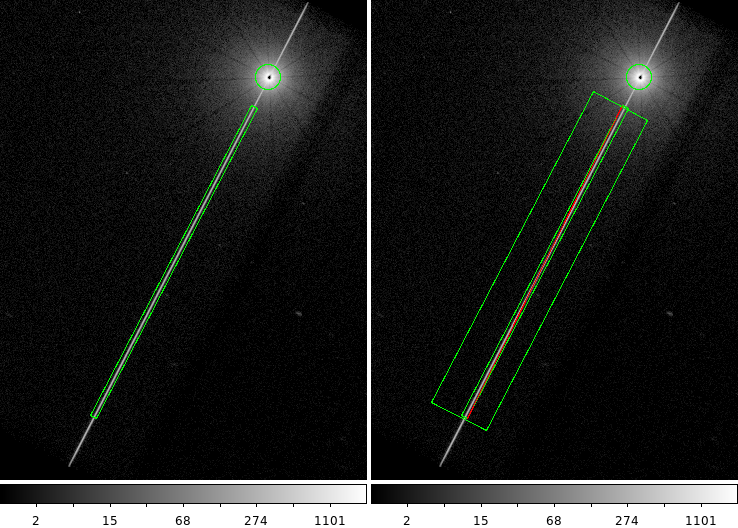

In [7]:
ds9 -scale log -bin factor 2 \
    acisf03662N004_evt2.fits -region onaxis.reg -region streak.reg \
    -pan to 4000 3700 physical \
    acisf03662N004_evt2.fits -region onaxis.reg -region streak_bg.reg \
    -pan to 4000 3700 physical \
    -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

In [8]:
pset dmextract infile="acisf03662N004_evt2.fits[sky=region(streak.reg)][bin pi]"
pset dmextract outfile=herx1.pi
dmextract mode=h clob+

In [9]:
pset dmextract infile="acisf03662N004_evt2.fits[sky=region(streak_bg.reg)][bin pi]"
pset dmextract outfile=herx1_bg.pi
dmextract mode=h clob+

In [10]:
dmstat "acisf03662N004_evt2.fits[sky=region(onaxis.reg)][cols chipx,chipy,ccd_id,x,y]" | grep mean

   mean:	( 121.66762545 868.19989483 )
   mean:	7 
   mean:	( 4171.0201176 4024.8903933 )


## RMF

In [11]:
dmkeypar acisf03662N004_evt2.fits gainfile echo+

acisD2000-01-29gain_ctiN0008.fits


In [12]:
pset mkacisrmf infile=$CALDB/data/chandra/acis/p2_resp/acisD2000-01-29p2_respN0008.fits 
pset mkacisrmf outfile=herx1_mkacisrmf.rmf
pset mkacisrmf energy=0.1:11.0:0.01
pset mkacisrmf channel=1:1024:1
pset mkacisrmf chantype=PI
pset mkacisrmf wmap=none
pset mkacisrmf ccd_id=7 chipx=121.70 chipy=868.31
pset mkacisrmf gain=$CALDB/data/chandra/acis/det_gain/acisD2000-01-29gain_ctiN0008.fits
mkacisrmf mode=h clob+



INFO: Effective user energy (keV) grids will be re-arranged in 
     0.25000 - 11.00000    


Single region, #9340 , processed.


#### mkrmf

In [13]:
acis_fef_lookup acisf03662N004_evt2.fits 7 121.70 868.33

/export/CIAOT/ciaot_install/20211019/ciao-4.14/CALDB/data/chandra/acis/fef_pha/acisD2000-01-29fef_pha_ctiN0004.fits[FUNCTION][ccd_id=7,chipx=97:128,chipy=865:896]


In [14]:
pset mkrmf infile=")acis_fef_lookup.outfile"
pset mkrmf outfile=herx1.rmf
pset mkrmf axis1="energy=0.1:11.0:0.01"
pset mkrmf axis2="pi=1:1024:1"
mkrmf mode=h clob+


## ARF

In [15]:
\ls pcadf*fits > pcad_asol1.lis
cat pcad_asol1.lis

pcadf03662_000N001_asol1.fits


In [16]:
pset asphist infile="@pcad_asol1.lis"
pset asphist outfile=herx1.asphist
pset asphist evtfile="acisf03662N004_evt2.fits[ccd_id=7]"
asphist mo=h cl+


In [17]:
pset mkarf asphistfile="herx1.asphist[ASPHIST]"
pset mkarf outfile=herx1.arf
pset mkarf obsfile="acisf03662N004_evt2.fits[EVENTS]"
pset mkarf maskfile=acisf03662_000N004_msk1.fits
pset mkarf pbkfile=
pset mkarf detsubsys=ACIS-S3
pset mkarf engrid="grid(herx1_mkacisrmf.rmf[cols ENERG_LO,ENERG_HI])"
pset mkarf sourcepixelx=4173.87 sourcepixely=4043.46
mkarf mode=h clob+

## Correct exposure time

In [18]:
dmkeypar acisf03662N004_evt2.fits EXPOSURE echo+

49577.78473833


In [19]:
dmkeypar acisf03662N004_evt2.fits EXPTIME echo+

3.1


In [20]:
echo "49577.78473833/3.1" | bc -l

15992.83378655806451612903


In [21]:
dmhedit infile=herx1.pi filelist="" operation=add key=EXPOSURE value=447.804

## Update spectrum

In [22]:
dmhedit infile=herx1.pi filelist="" operation=add key=BACKFILE value=herx1_bg.pi
dmhedit infile=herx1.pi filelist="" operation=add key=RESPFILE value=herx1_mkacisrmf.rmf
dmhedit infile=herx1.pi filelist="" operation=add key=ANCRFILE value=herx1.arf


# Cleanup


In [23]:
/bin/rm -rf 3662
/bin/rm -f acisf* pcadf* 